In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


In [6]:
# Load dataset
df = pd.read_excel('/content/Online Retail.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Handle missing values
df = df.dropna(subset=['CustomerID'])  # Drop rows with missing CustomerID

# Remove cancellations (negative quantities)
df = df[df['Quantity'] > 0]

# Calculate total spending per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data by CustomerID for clustering
customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',      # Total spending
    'Quantity': 'sum',        # Total items purchased
    'InvoiceNo': 'nunique'    # Number of transactions
}).rename(columns={'InvoiceNo': 'NumTransactions'})

# Log transform to reduce skewness (adding 1 to avoid log(0))
customer_data[['TotalPrice', 'Quantity']] = np.log1p(customer_data[['TotalPrice', 'Quantity']])

In [10]:
print("Preprocessed Data Shape:", X_scaled.shape)
customer_data.head()

Preprocessed Data Shape: (4339, 3)


,TotalPrice,Quantity,NumTransactions,Cluster
CustomerID,,,,
12346.0,11.253955,11.214735,1,1
12347.0,8.368925,7.807510,7,1
12348.0,7.494564,7.758761,4,1
12349.0,7.472245,6.448889,1,1
12350.0,5.815324,5.288267,1,0


In [8]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data)

# Elbow Method to Find Optimal K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

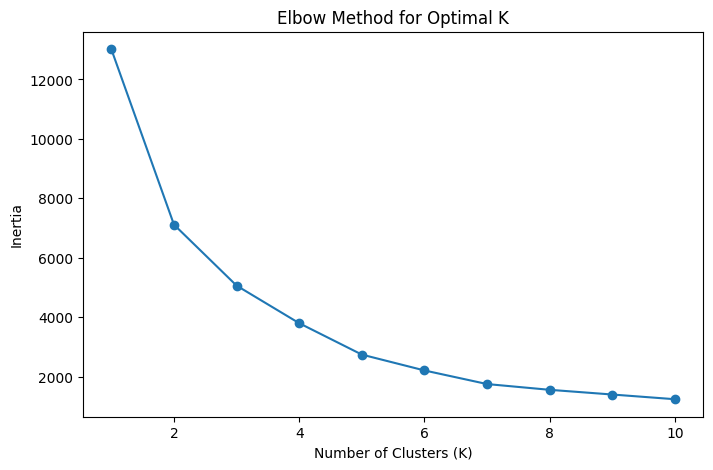

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

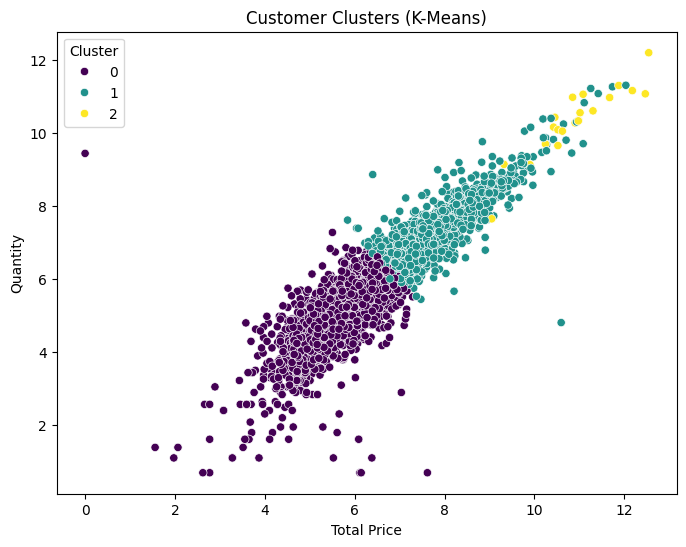

In [12]:
# Apply K-Means Clustering with Optimal K (assuming 3 from elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['TotalPrice'], y=customer_data['Quantity'], hue=customer_data['Cluster'], palette='viridis')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.title('Customer Clusters (K-Means)')
plt.show()

